## Classification Problem <br>

We are going to classify two astronomical objects, which are planets and RR Lyrae using **Machine Learning** algorithm called **Logistic Regression**. <br>


Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

In [1]:
# Importing important  modules
from __future__ import division
from additions import contour_plot, training_plots, accuracy, ROC,plot_confusion_matrix
from gradient_descent_example import learning_rate
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading in the training data

In [2]:
df_train = pd.read_csv("train_normalized.csv")

In [3]:
x_train = df_train[["period_SNR"]].values
y_train = df_train["class"].values

**Sigmoid Function**

In order to map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities. Mathematically the sigmoid function is defined as follows:


\begin{eqnarray}
\sigma= \frac{1}{1 + e^{-(Wx+b)}}=\sigma(z) = \frac{1}{1 + e^{-z}}
\end{eqnarray}

**Note** <br>
$\sigma(z)$ = output values between 0 and 1 (probabililty estimate)<br>
z = input to the function = Wx+b <br>
e = base of natural log <br>


**The sigmoid graph**
<img src="sigmoid.png" height="600" width="600">


**Decision Boundary**

The sigmoid function returns probability score between 0 and 1. In order to map this to a discrete class (true/false), we select a threshold value above which we will classify values into class 1 and below which we classify values into class 2.<br>

For example in the above plot we chose a threshold of 0.5 in order to classify the two classes. <br>

* p $\geq$ 0.5 , class 1
* p < 0.5 , class 0

## Create the sigmoid function by filling in the gaps

In [ ]:
def sigmoid(z):
    #Calculate the sigmoid of the argument z and return it
    
    sig = # Fill in here
    
    return sig

### Run the cell below to get the answer

In [16]:
# %load solutions/sigmoid.py

**Cost Function** <br>
A cost function's main purpose is to penalize bad choices for the parameters to be optimized and reward good ones. The cost function for logistic regression is written with logarithmic functions. An argument for using the log form of the cost function comes from the statistical derivation of the likelihood estimation for the probabilities.<br >

Instead of Mean Squared Error, we use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for y=1 and one for y=0.

\begin{eqnarray}
J({W,b}) = \frac{1}{m} error(\sigma,y)
\end{eqnarray}

\begin{eqnarray}
\
    error(\sigma,y) = 
\begin{cases}
    -log(\sigma) & \text{if } y= 1\\
    -log(1-\sigma)              & \text{if } y = 0
\end{cases}
\
\end{eqnarray}

Thus, we can combine the two cases as follows:
\begin{eqnarray}
J(W,b) = -\frac{1}{m}[\sum_{i=1}^m y.log(\sigma) + (1-y)log(1-\sigma) ] = C
\end{eqnarray}

Multiplying by y and (1−y) in the above equation is a clever way that allows us use the same equation to solve for both y=1 and y=0 cases. If y=0, the first side cancels out. If y=1, the second side cancels out. In both cases we only perform the operation we need to perform.

## Create the cost function by filling in the gaps

In [ ]:
def cost(y, x, W, b):
    #Calculate the argument of the sigmoid
    
    z = # Fill in here
    
    #Calculate the cost and return it
    
    C = # Fill in here
    
    return C

### Run the cell below to get the answer

In [17]:
# %load solutions/cost.py

**Gradient Descent** <br>

To minimize the cost function we use gradient descent method.

<img src="gradient_descent.png" height="600" width="600">

**Mathematics behind Gradiend descent:** <br >

The purpoose gradient descent is to find parameters that will minimize the cost function. The algorithm update the parameters as follows:

\begin{eqnarray}
W_j := W_j - \alpha\frac{\partial }{\partial W}J(W,b) 
\end{eqnarray}

$\alpha$ is the learning rate. It determines the amount of time the algorithm will take to converge. If $\alpha$ is too small the algorithm might take longer time to converge, and if is too large the algorithm might not converge. Refer to the clip that shows the concepts:

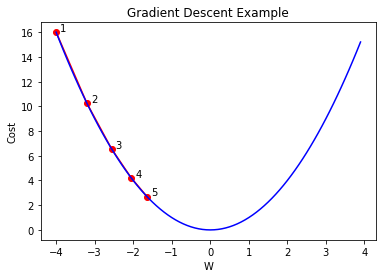

In [7]:
learning_rate(Wi=-4,steps=5,alpha=0.1)

We define : <br>
Then we can write: <br>

\begin{align}
C = -\frac{1}{m}[\sum_{i=1}^m y.log(\sigma) + (1-y)log(1-\sigma) ] 
\end{align}

then,

\begin{align}
\frac{\partial C}{\partial (\sigma)} = -\frac{1}{m} \sum_{i=1}^m y.\frac{1}{\sigma} + (1-y)\frac{-1}{1-\sigma}
\end{align}

\begin{align}
\frac{\partial C}{\partial W} = -\frac{1}{m}\sum_{i=1}^m y\frac{1}{\sigma(c)}\frac{\partial \sigma }{\partial W} +(1-y)\frac{-1}{1-\sigma(x)}\frac{\partial \sigma}{\partial W}
\end{align}

but,

\begin{align}
\frac{\partial \sigma}{\partial W} &= \frac{\partial \sigma }{\partial Z} \frac{\partial Z}{\partial W}\\
                                    &=\sigma(1-\sigma)x
\end{align}

Therefore,
\begin{eqnarray}
\frac{\partial C}{\partial W} = -\frac{1}{m}\sum_{i=1}^{m}(y-\sigma)x
\end{eqnarray}

\begin{eqnarray}
\frac{\partial C}{\partial b} = -\frac{1}{m}\sum_{i=1}^{m}(y-\sigma)
\end{eqnarray}

## Create the cost gradient function by filling in the gaps 

In [ ]:
def cost_gradient(y, x, W, b):
    #Calculate the the argument of sigmoid

    z = # Fill in here
    
    #Calculate the derivative of the cost function wrt z

    DcDz = # Fill in here
    
    #Calculate the derivatives wrt each parameter

    DcDW = # Fill in here
    DcDb = # Fill in here
    
    return DcDW, DcDb

### Run the cell below to get the answer

In [18]:
# %load solutions/cost_gradient.py

## Create the gradient descent function by filling in the gaps

In [ ]:
def gradient_descent(y, x, Wi, bi, alpha, steps):
    #Create arrays for the weights, bias and cost

    W = # Fill in here
    b = # Fill in here
    C = # Fill in here
    
    #Populate the first entry for each array  

    W[0] = # Fill in here
    b[0] = # Fill in here
    C[0] = # Fill in here
    
    #Perform gradient descent
    for i in range(steps):
        DW, Db = # Fill in here
        
        W[i+1] = # Fill in here
        b[i+1] = # Fill in here
        
        C[i+1] = # Fill in here
        
    return W, b, C

### Run the cell below to get the answer

In [7]:
# %load solutions/gradient_descent
def gradient_descent(y, x, Wi, bi, alpha, steps):
#     Create arrays for the weights, bias and cost
    W = np.zeros((steps+1, len(Wi)))
    b = np.zeros(steps+1)
    C = np.zeros(steps+1)
    
#   Populate the first entry for each array  
    W[0] = Wi
    b[0] = bi
    C[0] = cost(y, x, Wi, bi)
    
#     Perform gradient descent
    for i in range(steps):
        DW, Db = cost_gradient(y, x, W[i], b[i])
        
        W[i+1] = W[i] - alpha*DW
        b[i+1] = b[i] - alpha*Db
        
        C[i+1] = cost(y, x, W[i+1], b[i+1])
        
    return W, b, C


## Now let's initialize our parameters

In [8]:
np.random.seed(1234)
Wi = np.random.randn(x_train.shape[1])
bi = np.random.randn(1)

## Now let's run the gradient descent algorithm

In [9]:
W, b, C = gradient_descent(y_train, x_train, Wi, bi, alpha=10e-1, steps=100)

## Check out the how the paramters and cost have evolved

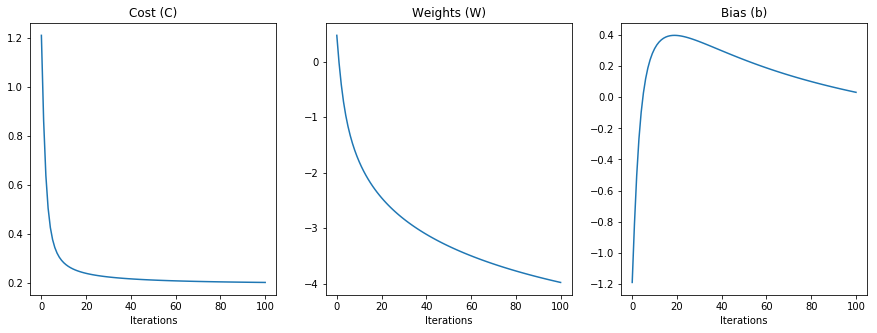

In [10]:
training_plots(W, b, C)

## We can see the path taken by gradient descent nicely on a contour plot of the cost function

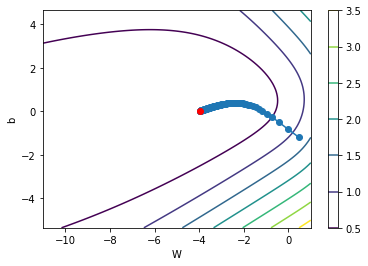

In [11]:
contour_plot(y_train, x_train, W, b);

# Now is time to test your classifier

## Load in the test data

In [12]:
df_test = pd.read_csv("test_normalized.csv")

In [13]:
x_test = df_test[["period_SNR"]].values
y_test = df_test["class"].values.astype(int)

In [14]:
acc, pred = accuracy(y_test, x_test, W[-1], b[-1], threshold=0.5)
print(acc)

93.3920704845815


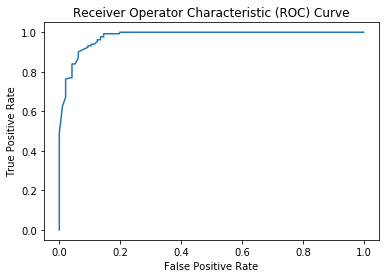

In [15]:
ROC(y_test, x_test, W[-1], b[-1]);

Confusion matrix, without normalization
[[ 82  14]
 [  1 130]]


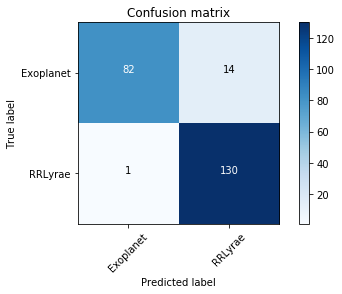

In [26]:
plot_confusion_matrix(y_test,pred)